In [1]:
%run talktools.py

## Photon Counting & the Exponential Distribution

* Jessica Avva
* Juan Camilo Buitrago-Casas [Milo]

### 1 Overview

Collect some data from a photomultiplier and investigate the statistics of interval between detection events. Histogram the data and relate the observed distribution to the theoretical probability distribution (the exponential distribution) by using the appropriate normalization. Investigate the relationship between the exponential distribution and the Poisson distribution by **binning the interval data into event counts per unit time interval.**

### Goals

Explore physical limitations on the detection of light. Investigate how precisely brightness can be specified, and what determines that precision.

### Key steps

1. Collect data from the photomultiplier experiment and plot the intervals between events vs. event number.

2. Explore the statistical properties of the mean interval between events recorded by the photomultiplier.

    a. Plot the mean time interval for data sequences of different length (different numbers of events). Show that the precision of the mean is quantified by the standard deviation of the mean, which is equal to s/√N. Here s is the population standard deviation and N is the number of events considered.

3. Plot histograms to visualize the statistical properties of the arrival time between events. Identify spurious “afterpulse” events and re-plot the histogram without these events. Compare the observed histogram with the theoretical expectation predicted by the exponential probability distribution. Describe how you convert from theoretical probability to the observed histogram of event intervals.

    a. Prove from the definition of the exponential probability distribution that the mean and standard deviation are equal.

4. Explore the relationship between the sample mean and the sample standard deviation for different data of sets where the LED brightness has been set to different levels.

5. Represent the recorded events as a time sequence of counts per bin versus time. Investigate the statistical properties of the resultant counts per bin for difference choices of bin width.

    a. Compare the observed histograms with the theoretical Poisson probabilitydistribution function.


In [141]:
'''Packages import'''
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import scipy.stats as ss
sns.set_context("paper")

## Exploring the obtained data

In [3]:
'''quick look to the data'''
!head -n 10 astro2_170215_1655_40.csv

head: astro2_170215_1655_40.csv: No such file or directory


In [4]:
'''Reading the file '''
f = pd.read_csv('/Users/Kamilobu/Desktop/AST203/LabReport02/PhotoMultiPlier/astro2_170215_1655_40.csv')
#f = pd.read_csv('astro_170215_1651_30.csv')
f.columns = ['#', 'time']

The time between events can be obtained by subtracting each value with its predecessor.

In [5]:
f['time'] = f['time'] - f['time'].shift(+1)
f.columns=['#','time interval']
f.drop(f.head(1).index, inplace=True) #drop the first data
f.drop(f[f['time interval'] < 0].index, inplace=True) # drop negative values
fvalues=f['time interval'][int(f['time interval'].size/2.5):f['time interval'].size].values

In [6]:
fvalues

array([  210889.,  3247699.,   712356., ...,  1168679.,  4333860.,
        3268608.])

### Interval between events vs. event number

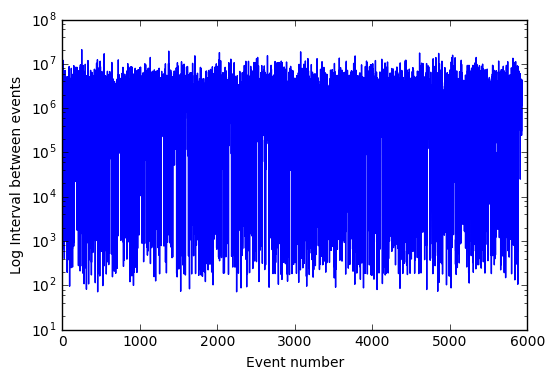

In [7]:
#jf['time interval'].plot(logy=True)
plt.semilogy(fvalues)
plt.xlabel('Event number')
plt.ylabel('Log Interval between events')

(0, 25000000.0)

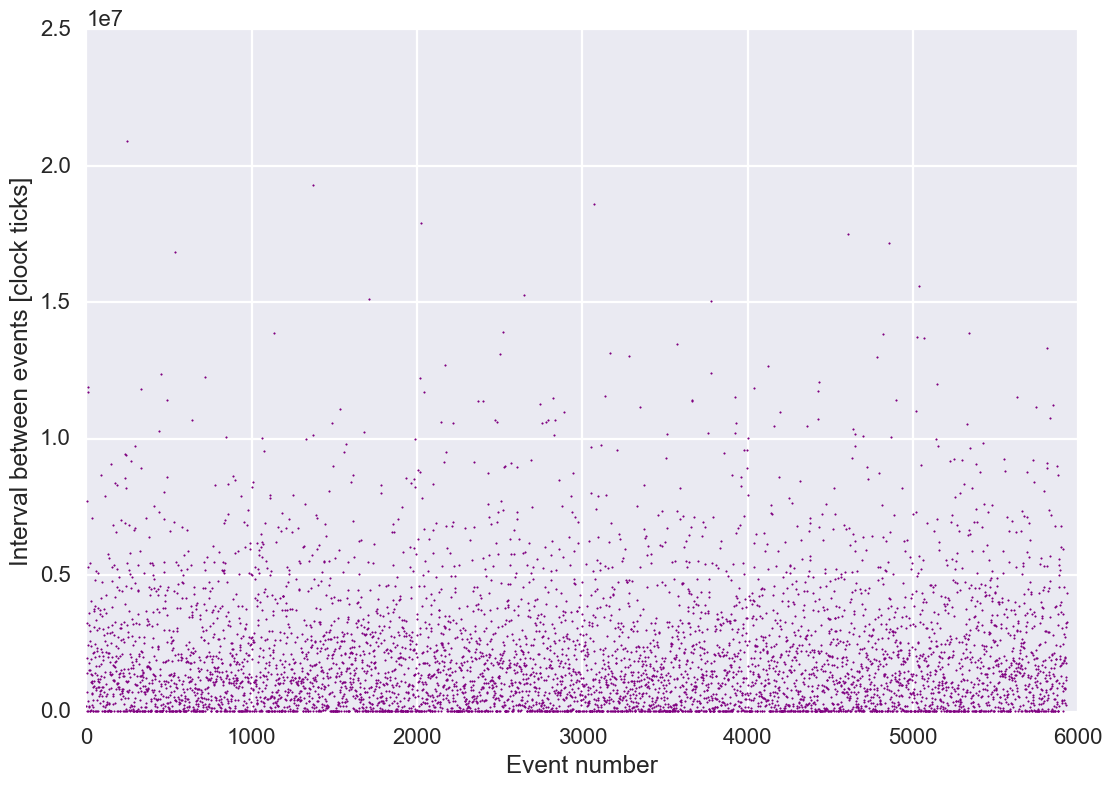

In [63]:
plt.scatter(np.arange(0,fvalues.size),fvalues,color='purple',s=1)
plt.xlabel('Event number')
plt.ylabel('Interval between events [clock ticks]')
plt.xlim(0,6e3)
plt.ylim(0,2.5e7)

## Statistical properties of the mean interval between events

### Mean time interval vs. data sequence length

In [9]:
'''Finding the mean for ten chunks of data'''
ma = []
Nchunks = 10
Schunk = int(fvalues.size/(2*Nchunks))

for i in range (0,Nchunks):
    #ma.append(f['time interval'].iloc[i*Schunk:(i+1)*Schunk].mean())
    ma.append(np.mean(fvalues[i*Schunk:(i+1)*Schunk]))

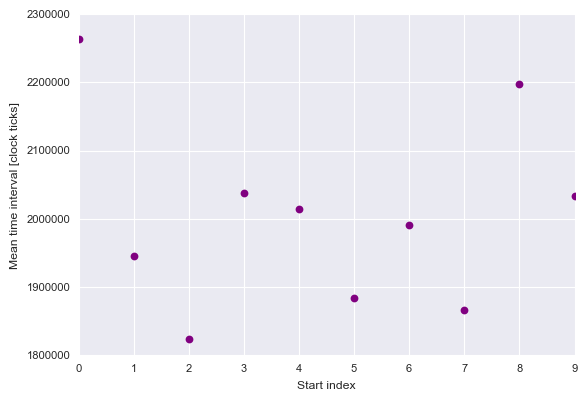

In [142]:
plt.plot(ma,'o',color='purple')
plt.xlabel('Start index')
plt.ylabel('Mean time interval [clock ticks]')

In [11]:
print('The mean of the means is',np.mean(ma),'ticks.')
print('and the standard deviation of the means is',np.std(ma),'ticks.')

The mean of the means is 2005767.02703 ticks.
and the standard deviation of the means is 132955.900855 ticks.


### Mean of data using progressively larger fractions of the data

In [145]:
m, sm = [], [] 
for i in range (1,int(fvalues.size)):
    m.append(np.mean(fvalues[0:i]))
    sm.append(np.std(fvalues[0:i]))

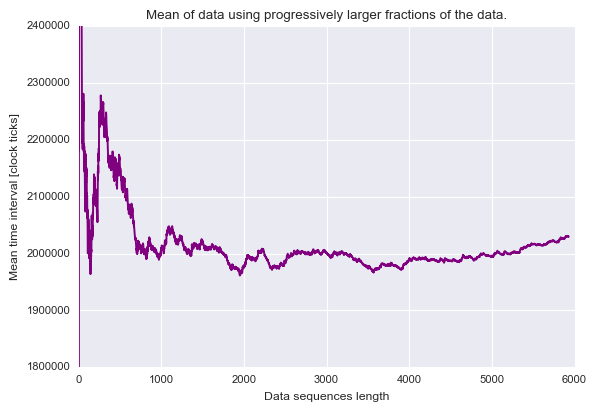

In [148]:
plt.plot(m,'-',color='purple')
plt.ylim(1.8e6,2.4e6)
#plt.ylim(2e6,2.2e6)
#plt.xlim(4e3,1e4)
plt.xlabel('Data sequences length')
plt.ylabel('Mean time interval [clock ticks]')
plt.title('Mean of data using progressively larger fractions of the data.')

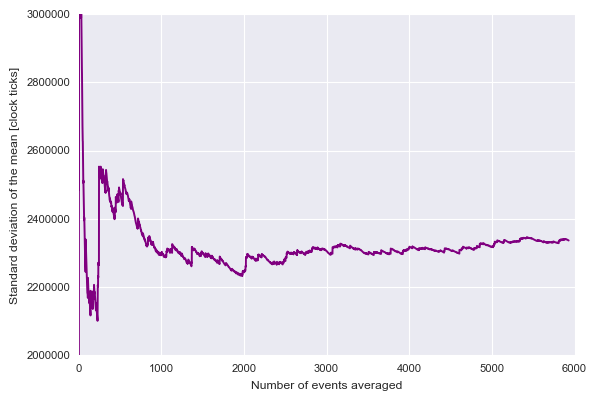

In [152]:
plt.plot(sm,'-',color='purple')
plt.ylim(2e6,3e6)
plt.xlabel('Number of events averaged')
plt.ylabel('Standard deviation of the mean [clock ticks]')

(0.05, 0.3)

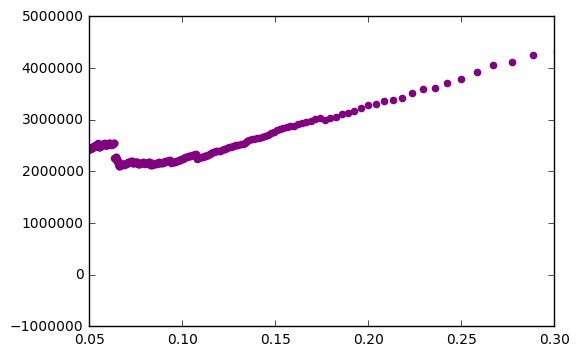

In [15]:
plt.scatter( (1./np.sqrt(np.arange(np.size(sm))+1)) , sm, color='purple')
plt.xlim(0.05,0.30)

(array([  1.25500000e+03,   3.67000000e+02,   3.42000000e+02,
          3.11000000e+02,   3.03000000e+02,   3.23000000e+02,
          2.86000000e+02,   2.17000000e+02,   2.21000000e+02,
          2.22000000e+02,   1.92000000e+02,   1.67000000e+02,
          1.38000000e+02,   1.34000000e+02,   1.29000000e+02,
          1.23000000e+02,   9.30000000e+01,   9.30000000e+01,
          9.00000000e+01,   7.50000000e+01,   6.70000000e+01,
          8.00000000e+01,   5.70000000e+01,   4.50000000e+01,
          5.80000000e+01,   5.30000000e+01,   4.60000000e+01,
          3.10000000e+01,   3.20000000e+01,   2.90000000e+01,
          2.20000000e+01,   2.90000000e+01,   3.10000000e+01,
          2.90000000e+01,   2.50000000e+01,   1.40000000e+01,
          1.10000000e+01,   1.10000000e+01,   7.00000000e+00,
          1.60000000e+01,   1.00000000e+01,   1.30000000e+01,
          1.00000000e+01,   1.20000000e+01,   8.00000000e+00,
          8.00000000e+00,   8.00000000e+00,   5.00000000e+00,
        

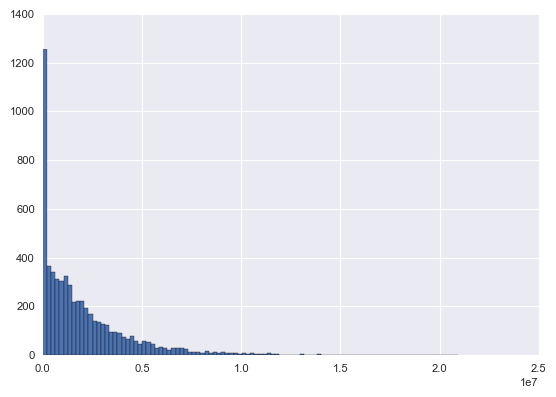

In [164]:
plt.hist(fvalues,bins=100)

### Zooming in Histogram

(array([ 19.,  21.,  12.,  56.,  27.,  25.,  16.,  33.,  33.,  20.,  20.,
         13.,  18.,  16.,  15.,  14.,   9.,  17.,  15.,  11.,  18.,  19.,
         12.,  17.,   9.,  12.,  12.,  13.,  14.,  16.,  13.,   6.,  12.,
         13.,  13.,  10.,   3.,   6.,  12.,   5.,   7.,   4.,  10.,   4.,
          7.,   9.,   9.,   5.,   8.,   4.,   4.,   7.,   3.,   4.,   5.,
          5.,   4.,   6.,   3.,   7.,   4.,   1.,   3.,   3.,   4.,   1.,
          2.,   5.,   5.,   2.,   2.,   2.,   1.,   4.,   0.,   0.,   1.,
          2.,   3.,   3.,   2.,   0.,   2.,   2.,   1.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,
          1.]),
 array([   71.  ,    99.88,   128.76,   157.64,   186.52,   215.4 ,
          244.28,   273.16,   302.04,   330.92,   359.8 ,   388.68,
          417.56,   446.44,   475.32,   504.2 ,   533.08,   561.96,
          590.84,   619.72,   648.6 ,   677.48,   706.36,   735.24,
          764.12,   793.  ,   821.88,   850.76

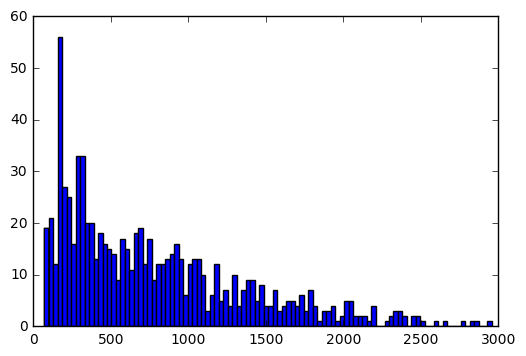

In [17]:
plt.hist(fvalues[fvalues < 3e3],bins=100)

In [18]:
nf = fvalues[fvalues > 3e3]

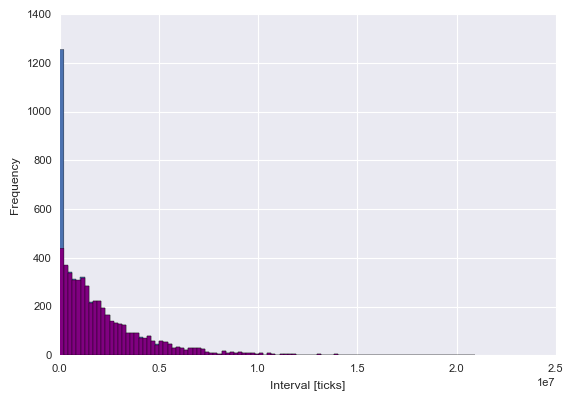

In [171]:
plt.hist(fvalues,bins=100)
plt.hist(nf,bins=100,color='purple')
plt.xlabel('Interval [ticks]')
plt.ylabel('Frequency')
plt.show()

In [20]:
nm, nsm = [], [] 
for i in range (1,int(nf.size)):
    nm.append(np.mean(nf[0:i]))
    nsm.append(np.std(nf[0:i]))

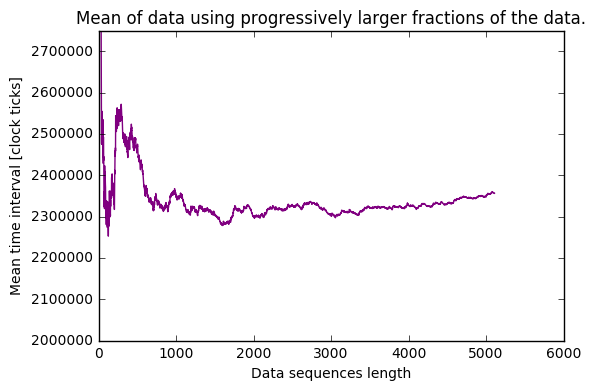

In [21]:
plt.plot(nm,'-',color='purple')
plt.ylim(2e6,2.75e6)
plt.xlabel('Data sequences length')
plt.ylabel('Mean time interval [clock ticks]')
plt.title('Mean of data using progressively larger fractions of the data.')

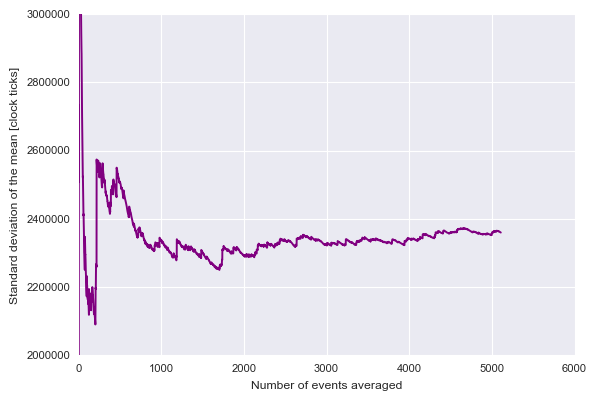

In [157]:
plt.plot(nsm,'-',color='purple')
plt.ylim(2e6,3e6)
plt.xlabel('Number of events averaged')
plt.ylabel('Standard deviation of the mean [clock ticks]')

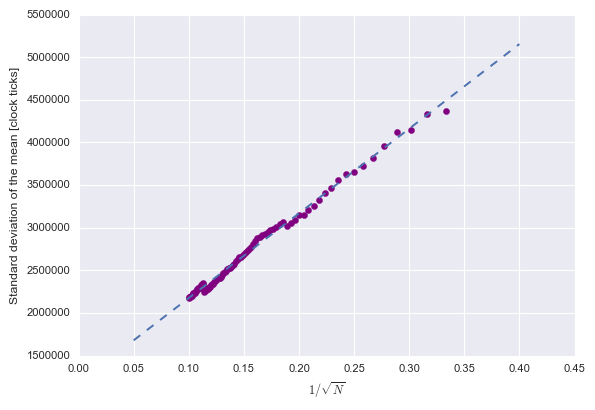

In [161]:
zmin, zmax = 8 , 100 #5109
srn = (1./np.sqrt(np.arange(np.size(nsm))+1))
axes = plt.gca()
plt.scatter( srn[zmin:zmax] , nsm[zmin:zmax] , color='purple')
m,b = np.polyfit(srn[zmin:zmax], nsm[zmin:zmax], 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '--', label = 'y = 0.9x+6.08')
plt.ylabel('Standard deviation of the mean [clock ticks]')
plt.xlabel(r'$1/\sqrt{N}$')
plt.show()

In [162]:
m,b

(9930507.5114001539, 1181783.2438794596)

(array([ 439.,  370.,  338.,  310.,  310.,  317.,  285.,  216.,  222.,
         223.,  192.,  164.,  140.,  131.,  130.,  124.,   93.,   93.,
          91.,   72.,   69.,   79.,   57.,   44.,   58.,   53.,   47.,
          30.,   32.,   29.,   22.,   30.,   30.,   29.,   25.,   14.,
          11.,   11.,    7.,   16.,   10.,   13.,   10.,   12.,    8.,
           8.,    8.,    5.,   10.,    3.,    9.,    6.,    3.,    5.,
           7.,    4.,    5.,    2.,    2.,    2.,    2.,    0.,    4.,
           1.,    1.,    2.,    4.,    0.,    0.,    0.,    0.,    1.,
           2.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    1.,    1.,    0.,    1.,    0.,    0.,    1.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  3.03100000e+03,   2.12104390e+05,   4.21177780e+05,
          6.30251170e+05,   8.39324560e+05,   1.04839795e+06,
          1.25747134e+06,   1.46654473e+06,   1.67561812e+06,
          1.88469151e+06

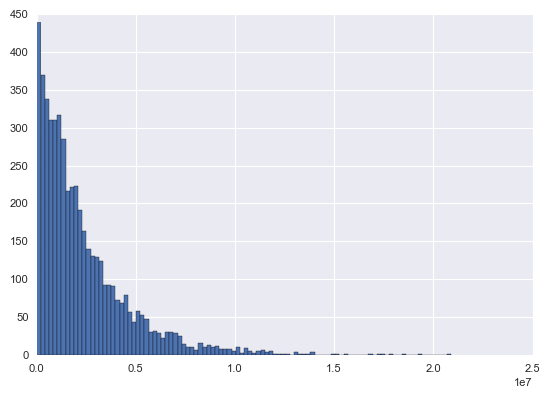

In [163]:
plt.hist(nf,bins=100)

In [89]:
rP

array([ 0.01956938,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp


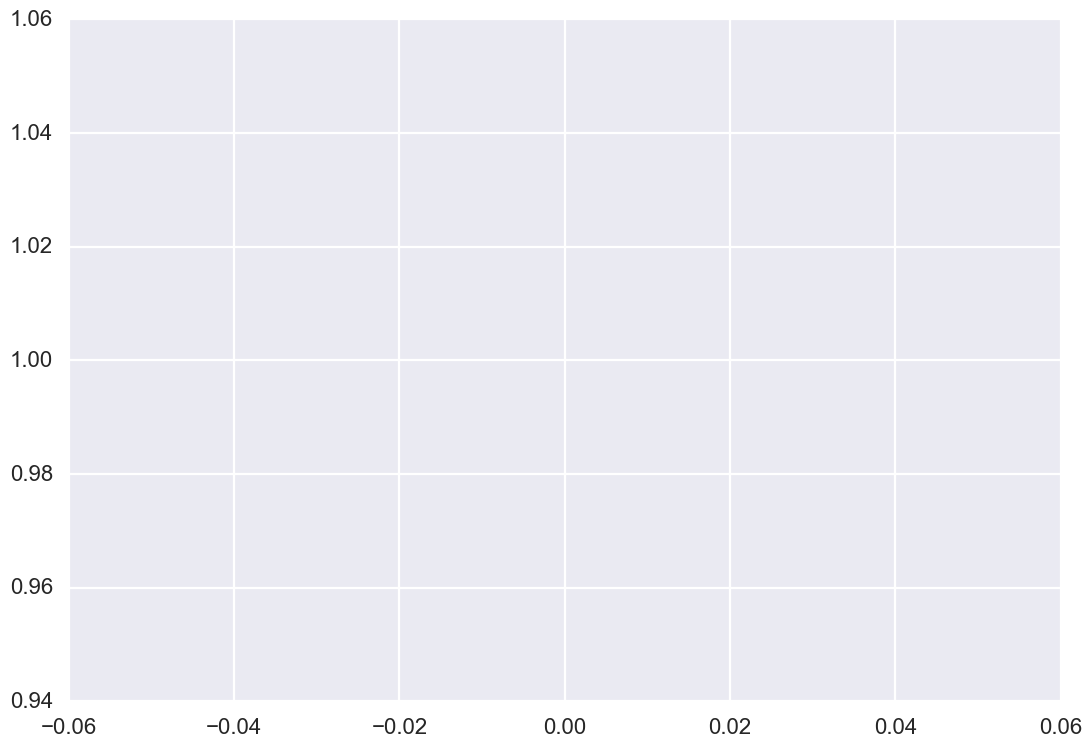

In [104]:
hi = np.histogram(nf,bins=100)
plt.plot(hi[1][0:-1],hi[0])


In [94]:
rP

array([ 0.01956938,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [115]:
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

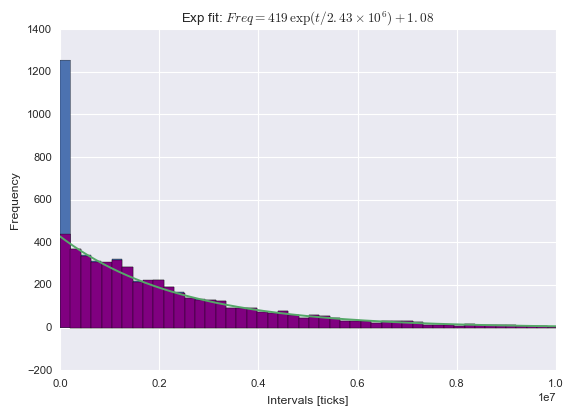

In [188]:
hi = np.histogram(nf,bins=100)
yh = hi[0]
xh = hi[1][0:-1]
#plt.plot(xh,yh)
plt.hist(fvalues,bins=100)
plt.hist(nf,bins=100,color='purple')
plt.xlabel('Interval [ticks]')
plt.ylabel('Frequency')
popt = np.array([  4.29e2       ,   4.12e-7     ,  -8.1e-1])
xx = np.linspace(0, 2.5e7, 1000)
yy = exponenial_func(xx, *popt)
plt.plot(xx,yy)
plt.xlabel('Intervals [ticks]')
plt.ylabel('Frequency')
plt.title(r'Exp fit: $Freq=419\,\exp{(t/2.43\times 10^6)} + 1.08$')
plt.xlim(0,1e7)
plt.show()

In [101]:
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

In [ ]:
popt, pcov = curve_fit(exponenial_func, xh, yh, p0=(1, 1e-6, 1))